# Finds optical events in a video file

### Imports

In [17]:
# Python standard library
import sys
import os

# Scientific computing
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Program specific
PORE_STATS_BASE_DIRECTORY = os.getcwd().replace('notebooks', '')
sys.path.append(PORE_STATS_BASE_DIRECTORY + '/pore_stats/oi/')
import optical_imaging as oi
import oi_file

# Jupyter
from IPython.display import HTML

### Load data

In [19]:
# Define file path
data_base_path = '/home/prestonh/Desktop/Research/cancer_cells/data'
date = '/7-17-2017'
particle_type = '/293-T'
channel_type = '/15-30-15_6'
file_index = '0'
file_path = data_base_path + date + particle_type + channel_type + '/oi/bin/test_camera_' + file_index

# Set output file path
output_file_path = file_path + '_events.json'

# Open video
oi_vid = oi_file.Video(file_path, 512, 288, 50000, 5)

### Functions

In [20]:
kernel = (15,15)

def preprocess_frame(frame):
    
    # Gaussian blur
    frame = cv2.GaussianBlur(frame, kernel, 0)
    
    
    
    return frame

In [21]:
def plot_frame(frame, show = True):
    plt.imshow(frame, cmap = 'gray', origin = 'lower', interpolation = 'none')
    if show:
        plt.show()

### Create template frame and check preprocessing

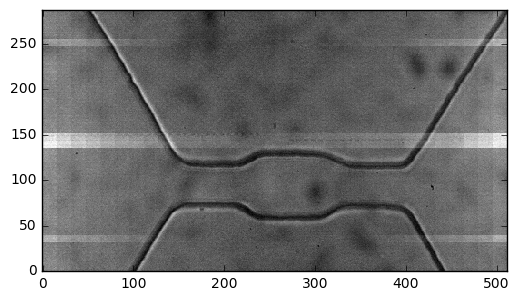

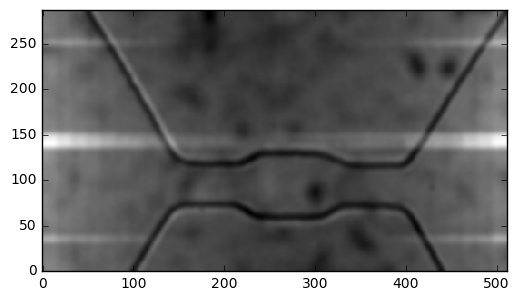

In [22]:
template_index = 0
template_frame = oi_vid.get_frame(template_index)
plot_frame(template_frame)

template_frame = preprocess_frame(template_frame)
plot_frame(template_frame)


### Find frame w/ particle

In [23]:
threshold_difference = 0.010

start_frame = 0

num_found = 0

for i in range(start_frame, oi_vid._total_frames):
    
    
    if i%1000 == 0:
        print 'i = ', i
        
    frame = preprocess_frame(oi_vid.get_frame(i))
    clusters = oi.find_clusters_percentage_based(frame, template_frame, cluster_threshold = 50, threshold_difference = threshold_difference, connect = True, connect_threshold = 25)
    if(len(clusters)) > 0:
        print 'event frame', i
        num_found+=1
        if num_found > 100:
            break
            pass
            

i =  0
event frame 81
event frame 82
event frame 83
event frame 84
event frame 85
event frame 86
event frame 87
event frame 88
event frame 89
event frame 90
event frame 91
event frame 92
event frame 93
event frame 94
event frame 95
event frame 96
event frame 97
event frame 98
event frame 99
event frame 100
event frame 101
event frame 102
event frame 103
event frame 104
event frame 105
event frame 106
event frame 107
event frame 108
event frame 109
event frame 110
event frame 111
event frame 112
event frame 113
event frame 114
event frame 115
event frame 116
event frame 117
event frame 118
event frame 119
event frame 120
event frame 121
event frame 122
event frame 123
event frame 124
event frame 125
event frame 126
event frame 127
event frame 128
event frame 129
event frame 130
event frame 131
event frame 132
event frame 133
event frame 134
event frame 135
event frame 136
event frame 137
event frame 138
event frame 139
event frame 140
event frame 141
event frame 142
event frame 143
even

KeyboardInterrupt: 

### Test template subtraction

1


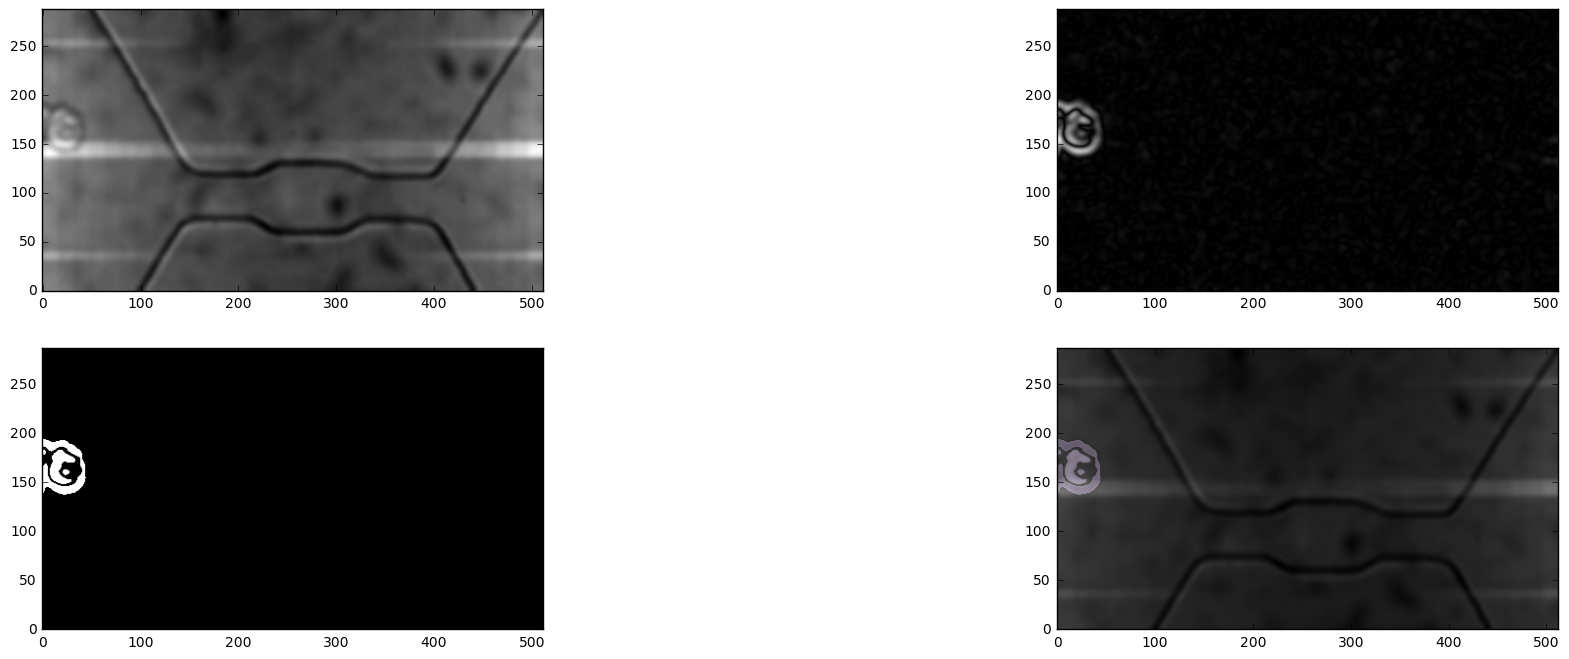

In [25]:
reload(oi)


index = 100

template_frame = preprocess_frame(oi_vid.get_frame(template_index))
raw_frame = preprocess_frame(oi_vid.get_frame(index))
frame = preprocess_frame(oi_vid.get_frame(index))

threshold_difference = .005#.035


cluster_threshold = 100


neg_frame = abs(frame - template_frame)
clusters = oi.find_clusters_percentage_based(frame, template_frame, threshold_difference = threshold_difference,\
                                             cluster_threshold = cluster_threshold, diag = True, connect = True, connect_threshold = 25)
temp_neg_frame = np.copy(neg_frame)
temp_neg_frame[temp_neg_frame > threshold_difference] = 1
temp_neg_frame[temp_neg_frame <= threshold_difference] = 0

print len(clusters)
fig, axes = plt.subplots(2,2,figsize=(24,8))

# Raw image
plt.sca(axes[0,0])
plt.imshow(frame, cmap = 'gray', origin = 'lower')

# Negative
plt.sca(axes[0,1])
plt.imshow(neg_frame, cmap = 'gray', origin = 'lower')

# Thresholded negative
plt.sca(axes[1,0])
plt.imshow(temp_neg_frame, vmin = 0, vmax = 1, cmap = 'gray', origin = 'lower')

# Color frame
color_frame = np.zeros((frame.shape[0], frame.shape[1], 3))
for cluster in clusters:
    rand_color = [np.random.rand(), np.random.rand(), np.random.rand()]
    for pixel in cluster:
        color_frame[pixel[0], pixel[1],:] = rand_color

plt.sca(axes[1,1])
plt.imshow(raw_frame, cmap = 'gray', origin = 'lower')
plt.imshow(color_frame, alpha = 0.55, origin = 'lower')


plt.show()

### Find events

In [26]:
reload(oi)
oi_events = oi.find_events(oi_vid, ti = 0, template_frame = oi_vid.get_frame(template_index), threshold_difference = threshold_difference, cluster_threshold = cluster_threshold, blur = True, kernel = kernel, connect = True, connect_threshold = 25)

/home/prestonh/Desktop/Research/pore_stats//pore_stats/oi/optical_imaging.py:1239: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if template_frame == None:


t:  1000 / 199893 	clusters: 0 	active: 0 	inactive: 19 	projected time: 3389.42886572  (s)
t:  2000 / 199893 	clusters: 0 	active: 0 	inactive: 19 	projected time: 1325.80889314  (s)
t:  3000 / 199893 	clusters: 0 	active: 0 	inactive: 20 	projected time: 1492.3229301  (s)
t:  4000 / 199893 	clusters: 1 	active: 1 	inactive: 20 	projected time: 1338.71003856  (s)
t:  5000 / 199893 	clusters: 0 	active: 0 	inactive: 21 	projected time: 1476.86273795  (s)
t:  6000 / 199893 	clusters: 0 	active: 0 	inactive: 23 	projected time: 1844.77593006  (s)
t:  7000 / 199893 	clusters: 0 	active: 0 	inactive: 29 	projected time: 2648.10030244  (s)
t:  8000 / 199893 	clusters: 0 	active: 0 	inactive: 42 	projected time: 2410.61285245  (s)
t:  9000 / 199893 	clusters: 0 	active: 0 	inactive: 43 	projected time: 1406.02830302  (s)
t:  10000 / 199893 	clusters: 0 	active: 0 	inactive: 48 	projected time: 1714.15002136  (s)
t:  11000 / 199893 	clusters: 0 	active: 0 	inactive: 52 	projected time: 1924.1

### Inspect trajectories

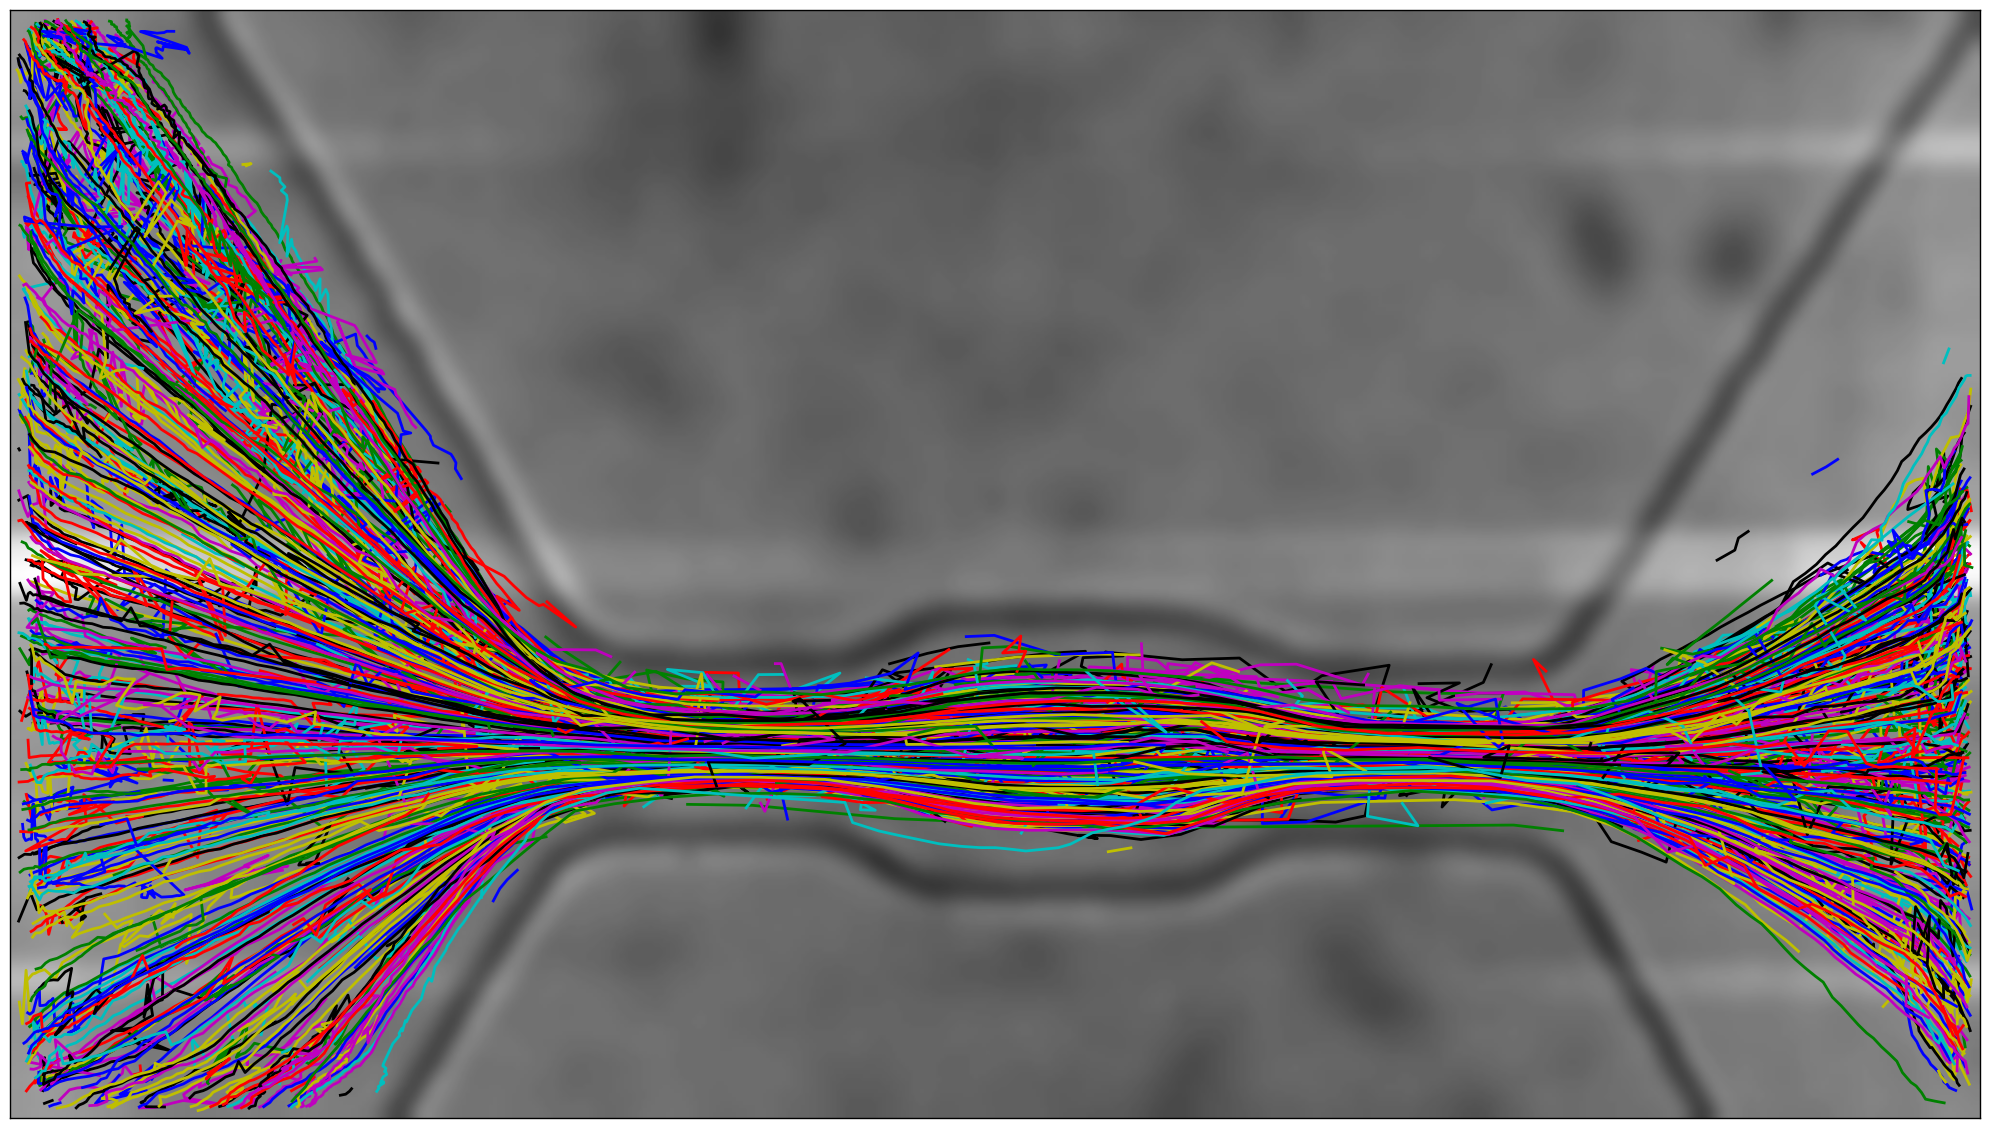

In [27]:
fig = plt.figure(figsize = (20,12))
for i, event in enumerate(oi_events[:]):
    px = []
    py = []
    for detection in event._detections:
        px.append(detection._px)
        py.append(detection._py)
    plt.plot(px, py, lw = 2)

plt.imshow(template_frame, alpha=0.8, cmap = 'gray', origin = 'lower')
plt.xticks([])
plt.yticks([])

fig.tight_layout()


plt.show()

### Filter events

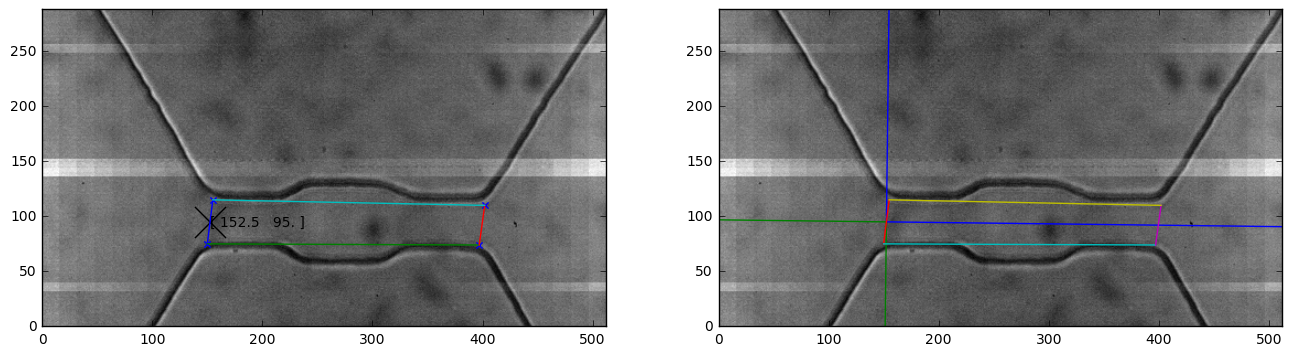

In [35]:
reload(oi)
template_index = 0
template_frame = oi_vid.get_frame(template_index)
c0 = [155, 115]
c1 = [150, 75]
c2 = [397, 74] 
c3 = [402, 110]
oi_stage = oi.Stage(template_frame, c0, c1, c2, c3)
oi_stage._length_microns = 150
oi_stage.plot_stage()

In [36]:
for oi_event in oi_events:
    oi_event.get_channel_enter_exit_tf(oi_stage)

In [37]:
filtered_oi_events = [oi_event for oi_event in oi_events if (oi_event._channel_enter_tf != None) and (oi_event._channel_exit_tf != None)]
print len(filtered_oi_events)

201


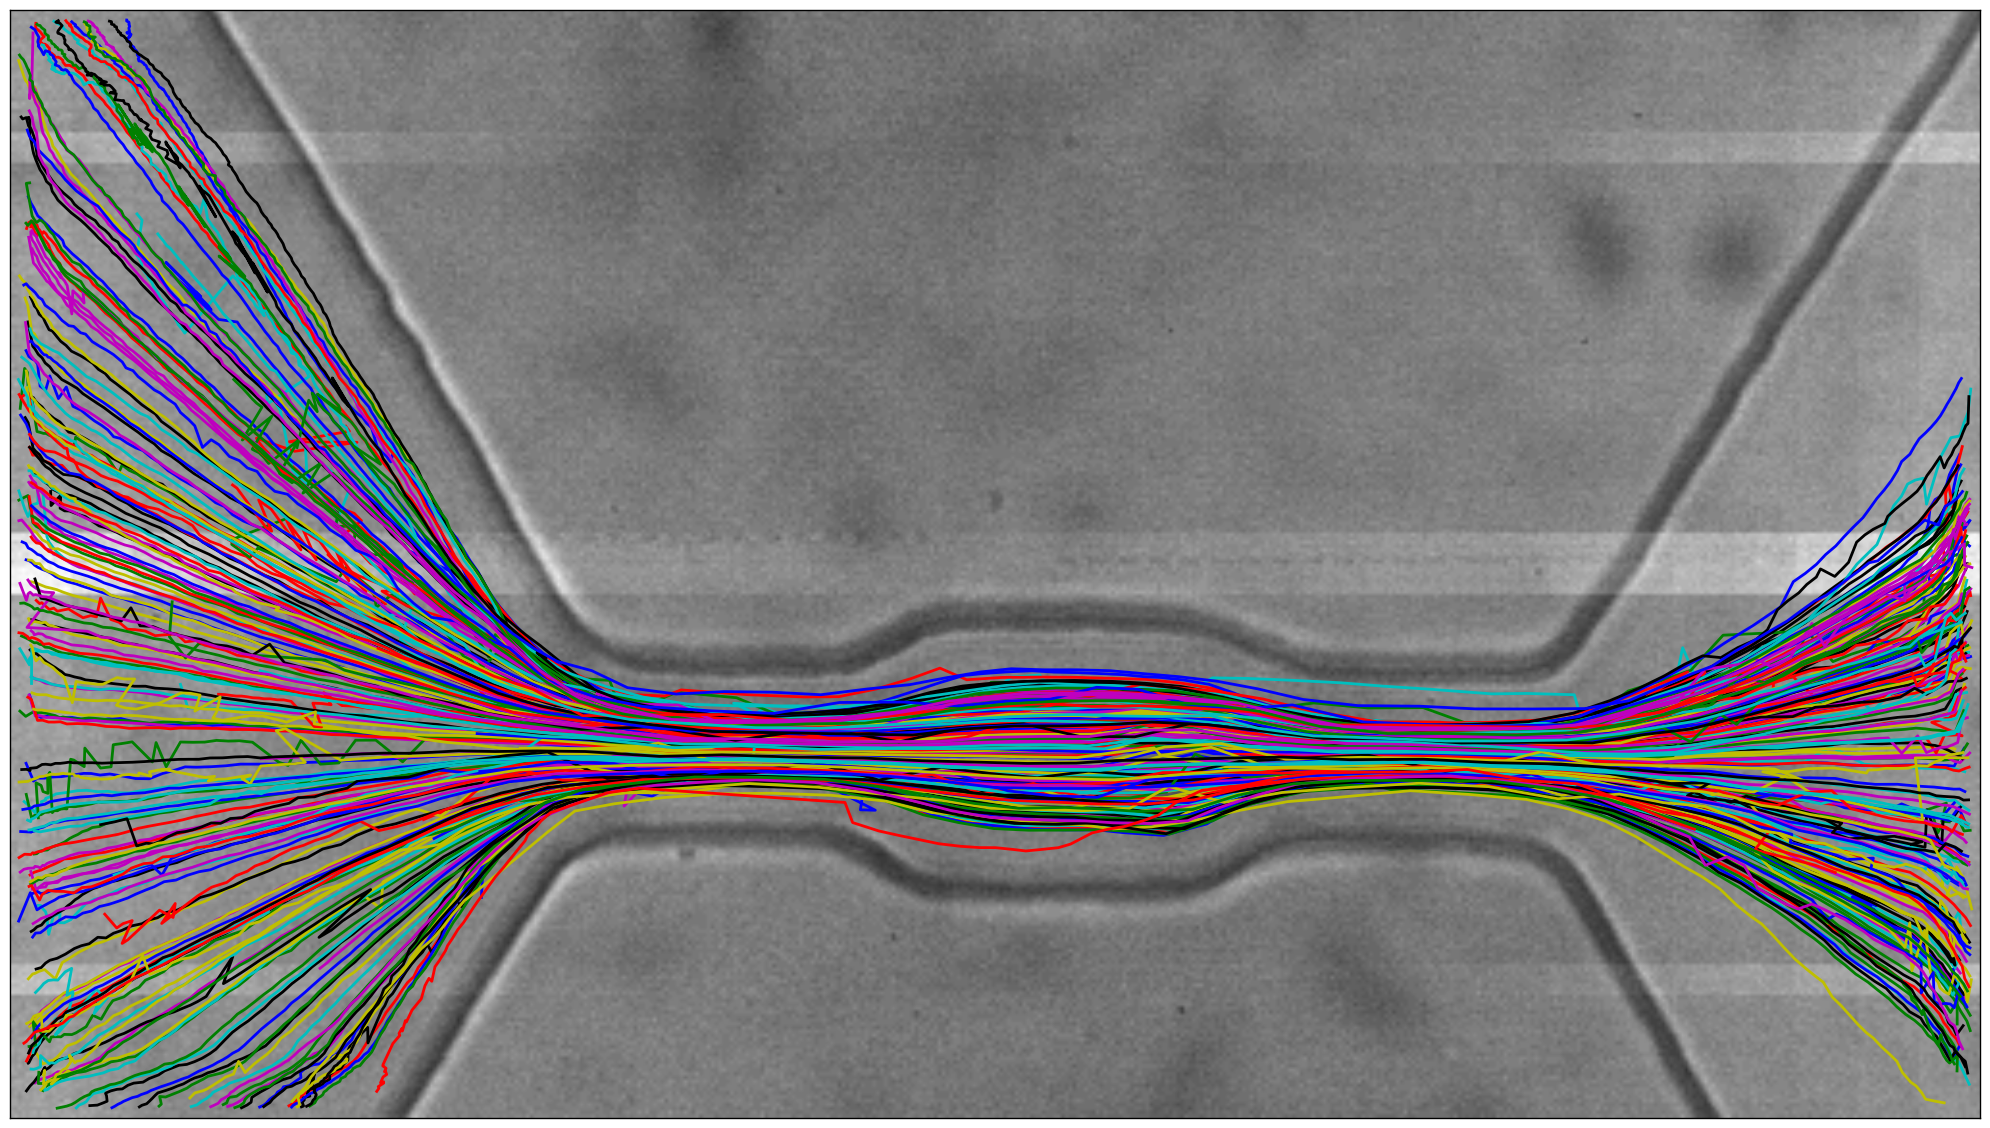

In [39]:
fig = plt.figure(figsize = (20,12))
for i, event in enumerate(filtered_oi_events[:]):
    px = []
    py = []
    for detection in event._detections:
        px.append(detection._px)
        py.append(detection._py)
    plt.plot(px, py, lw = 2)

plt.imshow(template_frame, alpha=0.8, cmap = 'gray', origin = 'lower')
plt.xticks([])
plt.yticks([])

fig.tight_layout()


plt.show()

In [ ]:
oi_index = 200
reload(oi_file)
plt.close()
HTML(oi_file.make_animation(oi_vid, filtered_oi_events[oi_index]._detections[0]._tf, filtered_oi_events[oi_index]._detections[-1]._tf).to_html5_video())

### Save events

In [40]:
print output_file_path

/home/prestonh/Desktop/Research/cancer_cells/data/7-17-2017/293-T/15-30-15_6/oi/bin/test_camera_0_events.json


In [41]:
oi_file.save_oi_events_json(output_file_path, filtered_oi_events)
print 'saved!'